In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv(r"C:\Users\HP\Desktop\Most Streamed Spotify Songs 2024.csv", encoding='ISO-8859-1')

# Data Wrangling

In [11]:
def filter(df):
    # List of columns to convert from to floats, removing commas and extra spaces
    columns_to_convert = [
        'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
        'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views',
        'YouTube Playlist Reach', 'AirPlay Spins', 'SiriusXM Spins',
        'Deezer Playlist Reach', 'Pandora Streams', 'Pandora Track Stations',
        'Soundcloud Streams', 'Shazam Counts'
    ]
    
    # Convert object columns to floats
    for col in columns_to_convert:
        df[col] = pd.to_numeric(df[col].str.replace(',', '').str.strip())

    # Convert Release Date to datetime
    df['Release Date'] = pd.to_datetime(df['Release Date'])

    # Drop columns where less than 50% of rows have non-null values
    threshold = len(df) * 0.5
    columns_to_keep = df.columns[df.count() >= threshold]
    df = df[columns_to_keep]

    # Dropping columns with less than 50%
    df = df.drop(["SiriusXM Spins"], axis=1)
    
    # Reset the index to start from 1
    df.reset_index(drop=True, inplace=True)
    df.index = df.index + 1

    return df


In [13]:
df = filter(df)

In [15]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
1,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,1.505970e+08,210.0,40975.0,62.0,17598718.0,114.0,18004655.0,22931.0,2669262.0,0
2,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,1.563804e+08,188.0,40778.0,67.0,10422430.0,111.0,7780028.0,28444.0,1118279.0,1
3,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,3.737850e+08,190.0,74333.0,136.0,36321847.0,172.0,5022621.0,5639.0,5285340.0,0
4,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,3.351189e+09,394.0,1474799.0,264.0,24684248.0,210.0,190260277.0,203384.0,11822942.0,0
5,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,1.127639e+08,182.0,12185.0,82.0,17660624.0,105.0,4493884.0,7006.0,457017.0,1


In [17]:
# Check data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 1 to 4600
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4595 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   object        
 6   Track Score                 4600 non-null   float64       
 7   Spotify Streams             4487 non-null   float64       
 8   Spotify Playlist Count      4530 non-null   float64       
 9   Spotify Playlist Reach      4528 non-null   float64       
 10  Spotify Popularity          3796 non-null   float64       
 11  YouTube Views               4292 non-null   float64     

# Top 10 Most Streamed Tracks on Each Platform
We want to know which tracks are dominating, and more importantly, which track is dominating. And also , each platform caters to a different audience, so a track killing it on Spotify might not even register on YouTube. Looking at these charts lets us spot universal hits versus platform-specific trends, which could help with marketing strategies, artist positioning, or just understanding audience behavior across channels.

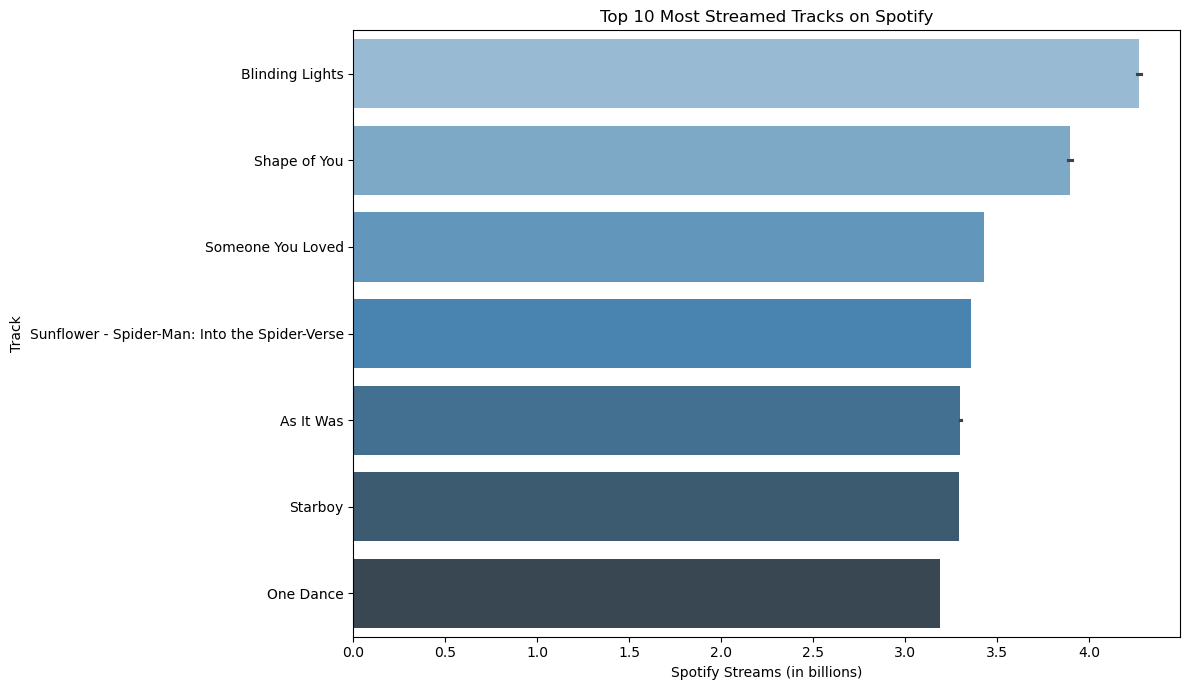

In [20]:
# Spotify Top 10 Most Streamed Tracks
top_spotify_streams = df[['Track', 'Spotify Streams']].dropna().sort_values(by='Spotify Streams', ascending=False).head(10)
top_spotify_streams['Spotify Streams (Billions)'] = top_spotify_streams['Spotify Streams'] / 1e9

plt.figure(figsize=(12, 7))
sns.barplot(data=top_spotify_streams, x='Spotify Streams (Billions)', y='Track', palette='Blues_d')
plt.title('Top 10 Most Streamed Tracks on Spotify')
plt.xlabel('Spotify Streams (in billions)')
plt.tight_layout()
plt.show()


At the top, “Blinding Lights” is pushing over 4.2 billion streams, very high, meaning it really went viral. “Shape of You” trails it slightly—just above 3.7 billion—which is still high, and we can notice the gap: almost half a billion streams between first and second.

As we move down—“Someone You Loved,” “Sunflower,” “As It Was”—we start seeing tracks clustered between 2.5 and 3.5 billion. This cluster suggests that the artists share a strong, similar musical appeal and likely gained widespread recognition through social media exposure(first guess is tik tok), film features (such as Sunflower), and international radio play.

The bottom of the chart—“One Dance”—sits close to 2.6 billion. And even that is an insane number when you consider how many songs don’t even break 100 million. Drake stays in the billions club effortlessly, but here he's at the lower edge of this elite set.

At 2.5 billion streams, you're among the elite. But to push past 4 billion, an artist needs more than viral success, they need platform-wide presence and sustained cultural momentum.

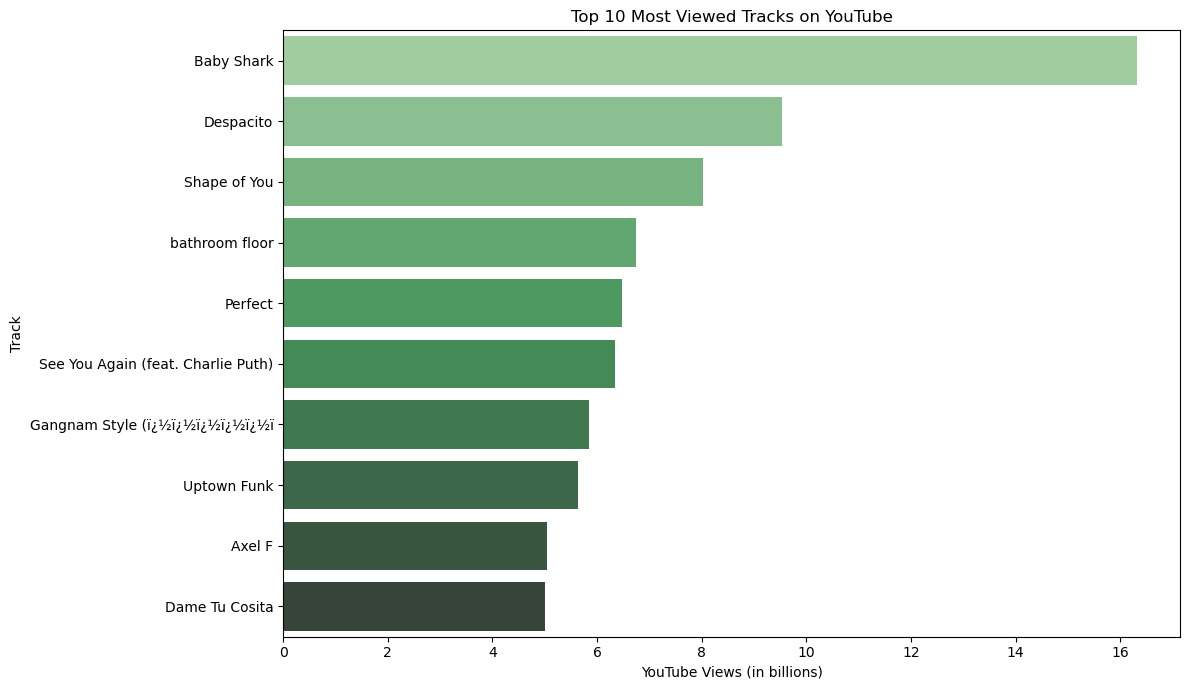

In [23]:
# Top 10 YouTube tracks
top_youtube_views = df[['Track', 'YouTube Views']].dropna().sort_values(by='YouTube Views', ascending=False).head(10)
top_youtube_views['YouTube Views (Billions)'] = top_youtube_views['YouTube Views'] / 1e9

plt.figure(figsize=(12, 7))
sns.barplot(data=top_youtube_views, x='YouTube Views (Billions)', y='Track', palette='Greens_d')
plt.title('Top 10 Most Viewed Tracks on YouTube')
plt.xlabel('YouTube Views (in billions)')
plt.tight_layout()
plt.show()

What we’re seeing in that chart isn’t just a bunch of popular songs. It’s the chart of what millions of people—especially kids love. Look at “Baby Shark.” That’s not a song one can  casually listen to with headphones on.Kids hit replay like it’s a life mission. And YouTube counts every single one. That’s how it steamrolled past the likes of Despacito and Shape of You.

Then there’s Despacito, the global hit, multilingual sweetness coupled with sexy visuals, it had its viral moment and then some. But it doesn’t loop like the Baby Shark does. Same for “See You Again”, that one hits emotionally, people revisit it, sure, but it’s more about grief and memory than repeat joy.

YouTube’s top tracks aren’t just about great music. They’re about how often a track replays. If Spotify is the place we go to feel music, YouTube is the place we go to see and relive the music. And that’s how we get a chart that mixes reggaeton, animated sharks, Korean dance explosions, and sad pop ballads.

# Correlation Between Streams and Platform Metrics (e.g., TikTok Likes vs Spotify Streams)
This isn't just about numbers — it's about influence. If likes, views, or posts on a platform like TikTok are strongly related to streams on Spotify, that suggests real-world impact. We're testing whether virality actually drives listening behavior. A strong correlation tells us that engagement on one platform is more than vanity — it translates to tangible results.

In [3]:
# First, let's drop NaN values in these specific columns
df_spotik = df[['Spotify Streams', 'TikTok Likes']].dropna()

# Calculate the correlation
correlation = df_spotik.corr()

# Display the correlation matrix
print(correlation)

# Plotting the correlation as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', linewidths=1)
plt.title('Correlation between Spotify Streams and TikTok Likes')
plt.show()


NameError: name 'df' is not defined

This correlation result, showing a coefficient of roughly 0.04 between TikTok Likes and Spotify Streams, reveals a striking disconnect between fan engagement on TikTok and actual streaming behavior on Spotify. Contrary to the popular belief that viral TikTok success translates directly to high stream counts, this means otherwise — at least within the scope of the data we have. The low correlation implies that liking a track on TikTok doesn't necessarily mean users will go on to stream it on Spotify. This weak linkage could be due to differences in user intent across platforms: TikTok thrives on short, shareable moments, seperate from full-track listening habits.

# Do Tracks with High Playlist Reach Get More Streams?
Playlists are the highways of modern music discovery. If a track is sitting in more playlists or reaching more listeners through them, does it actually get more streams? This checks whether those placements are valuable or just digital shelf space. If reach ≠ streams, maybe our targeting or playlist curation strategy needs work.
Lets check if tracks with higher playlist reach are more streamed, we can plot a scatter plot and calculate the correlation:

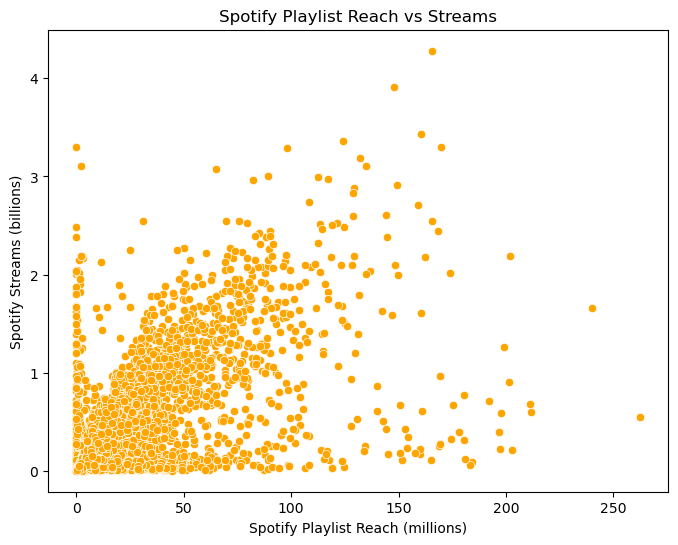

                        Spotify Playlist Reach  Spotify Streams
Spotify Playlist Reach                1.000000         0.589893
Spotify Streams                       0.589893         1.000000


In [35]:
# Cleaning up data for playlist reach and streams
df_cleaned_reach_streams = df[['Spotify Playlist Reach', 'Spotify Streams']].dropna()
df_cleaned_reach_streams['Spotify Playlist Reach'] = df_cleaned_reach_streams['Spotify Playlist Reach']/1e6
df_cleaned_reach_streams['Spotify Streams'] = df_cleaned_reach_streams['Spotify Streams']/ 1e9                    

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Spotify Playlist Reach', y='Spotify Streams', data=df_cleaned_reach_streams, color='orange')
plt.title('Spotify Playlist Reach vs Streams')
plt.xlabel('Spotify Playlist Reach (millions)')
plt.ylabel('Spotify Streams (billions)')
plt.show()

# Calculate the correlation
reach_stream_correlation = df_cleaned_reach_streams.corr()
print(reach_stream_correlation)


The correlation between Spotify Playlist Reach and Streams is moderate at 0.59, suggesting that tracks with higher playlist reach tend to have more streams, but the relationship is not strong or consistent. The scatterplot shows a dense cluster of tracks with reach below 50 million and streams below 1 billion, indicating that most tracks operate within this lower range. However, even tracks with reach above 150 million often have streams well below 500 million, revealing a significant variation. This wide spread implies that while playlist reach offers exposure, it doesn’t guarantee high streaming numbers. Other factors like track quality, timing, and audience engagement might likely play a significant role in driving actual plays.

# Spotify Popularity vs YouTube Views
Spotify popularity is an opaque internal metric, while YouTube views are publicly visible. Comparing the two can reveal how much Spotify’s algorithm-driven popularity aligns with organic audience interest. If there's a disconnect, it may signal that platform ecosystems reward different types of content or artist behavior.

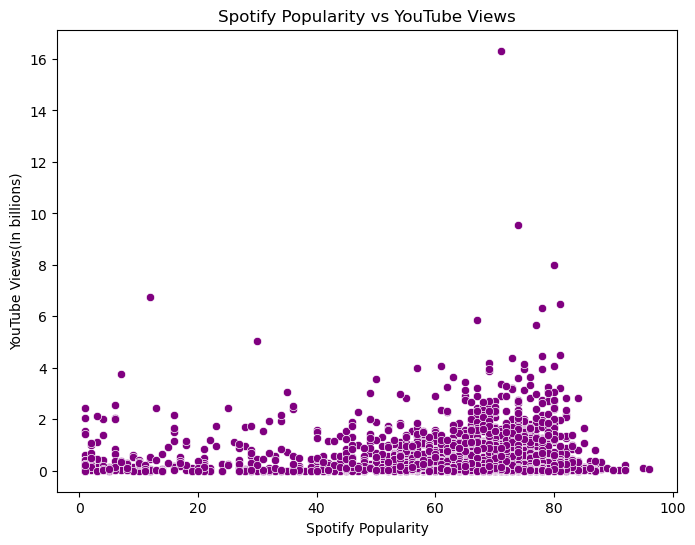

                    Spotify Popularity  YouTube Views
Spotify Popularity            1.000000       0.035983
YouTube Views                 0.035983       1.000000


In [73]:
# Cleaning up data for Spotify Popularity and YouTube Views
df_cleaned_popularity_views = df[['Spotify Popularity', 'YouTube Views']].dropna()
df_cleaned_popularity_views['YouTube Views'] = df_cleaned_popularity_views['YouTube Views']/1e9

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Spotify Popularity', y='YouTube Views', data=df_cleaned_popularity_views, color='purple')
plt.title('Spotify Popularity vs YouTube Views')
plt.xlabel('Spotify Popularity')
plt.ylabel('YouTube Views(In billions)')
plt.show()

# Calculate the correlation
popularity_views_correlation = df_cleaned_popularity_views.corr()
print(popularity_views_correlation)


The correlation matrix shows a very weak positive correlation of 0.0359, essentially negligible. That means Spotify's popularity metric (which includes streams, skips, saves, etc.) doesn’t really match with YouTube viewership. There are points where a song is very popular on Spotify but has under 1 billion YouTube views — and vice versa. This means platform-specific behavior: a track could perform algorithmically well on Spotify due to playlist boosts or audio-focused listening, while flopping on YouTube if the visual experience doesn’t click. Artists may need different ways of tackling this across platforms — visuals matter more on YouTube.

# Track Performance by Release Month (Seasonal Trends)
Release timing can be a silent factor in a track's success. You’re checking if certain months give tracks a boost — maybe summer brings more streams due to holidays and free time, or December tracks ride holiday playlists. Knowing this helps optimize release schedules, especially if you’re managing or advising artists.

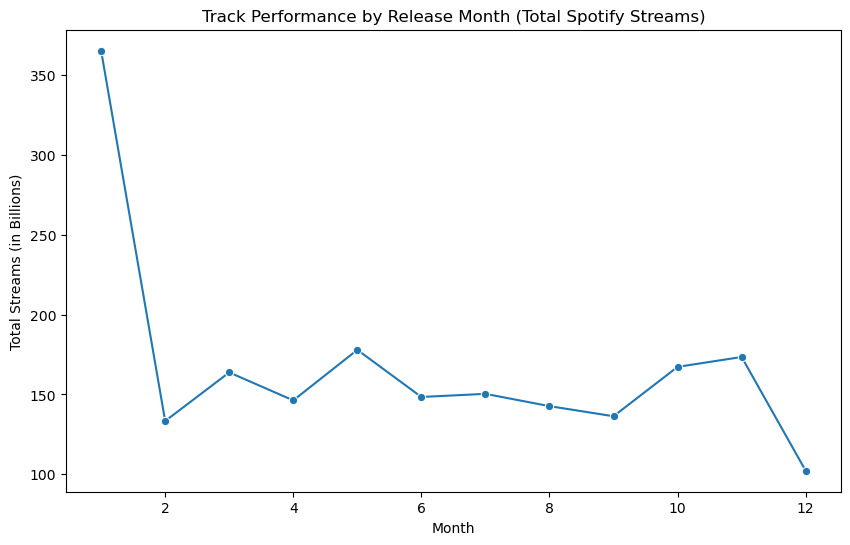

In [61]:
monthly_performance['Spotify Streams'] = monthly_performance['Spotify Streams'] / 1e9

plt.figure(figsize=(10, 6))
sns.lineplot(x='Release Month', y='Spotify Streams', data=monthly_performance, marker='o')

plt.title('Track Performance by Release Month (Total Spotify Streams)')
plt.xlabel('Month')
plt.ylabel('Total Streams (in Billions)')
plt.show()


The seasonality plot tells a revealing story: January sees the highest spike in total streams, exceeding 350 billion, while most other months hover between 130 and 180 billion. December, surprisingly, goes under 120 billion, possibly due to competition from Christmas classics and fewer major releases. This implies January is a prime release window — perhaps due to fewer new drops and more listener availability. The idea? Early-year releases could gain an edge in discoverability and streaming volume.

# Conclusion
This analysis shows that music doesn’t perform the same way across platforms. Some songs, like *Blinding Lights*, are hits everywhere, but others only do well in specific places. Getting on a big Spotify playlist helps with streams, but going viral on TikTok doesn’t always mean people will actually listen on Spotify. And just because a song is popular on Spotify doesn’t mean it’ll blow up on YouTube. Each platform runs on its own logic, and timing still plays a big role in how well a track does.